In [1]:
# Add the root path of the pyqula library
import os ; import sys
try: sys.path.append(os.environ["PYQULAROOT"]) # add the library via environmental variable
except: 
    try: from pyqula import geometry # check if the library is present
    except: #print("Install pyqula with\npip install --upgrade pyqula") # pyqula must be installed
        print("pyqula needs to be installed, installing it")
        import subprocess ; subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade","pyqula"])

# some default parameters in matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['image.cmap'] = 'coolwarm'


import numpy as np

# Advanced Quantum Materials, session 5: The Quantum Hall effect
In this session we will address several examples of topological states of matter, including Quantum Hall insulators and quantum spin Hall insulators

### Contents
- Landau levels the quantum Hall state for quadratic electrons
- Edge states in the quantum Hall state for quadratic electrons
- Energy spacing between Landau levels for quadratic electrons
- Landau levels the quantum Hall state for Dirac electrons
- Edge states in the quantum Hall state for Dirac electrons
- Energy spacing between Landau levels for Dirac electrons

### Learning outcomes
- Identify Landau levels in an electronic spectra
- Understanding the energy scaling with the magnetic field

### How the exercises are organized
- (Remider): This are introductory exercises. You can skip them if you feel comfortable with basics of the topic
- (Exercise): Conventional exercise
- Quiz: short questions to answer, for Exercise or Reminder

## (Remider): The dispersion of the square lattice
This is a reminder of the disperison in the square lattice

(0.0, 399.0)

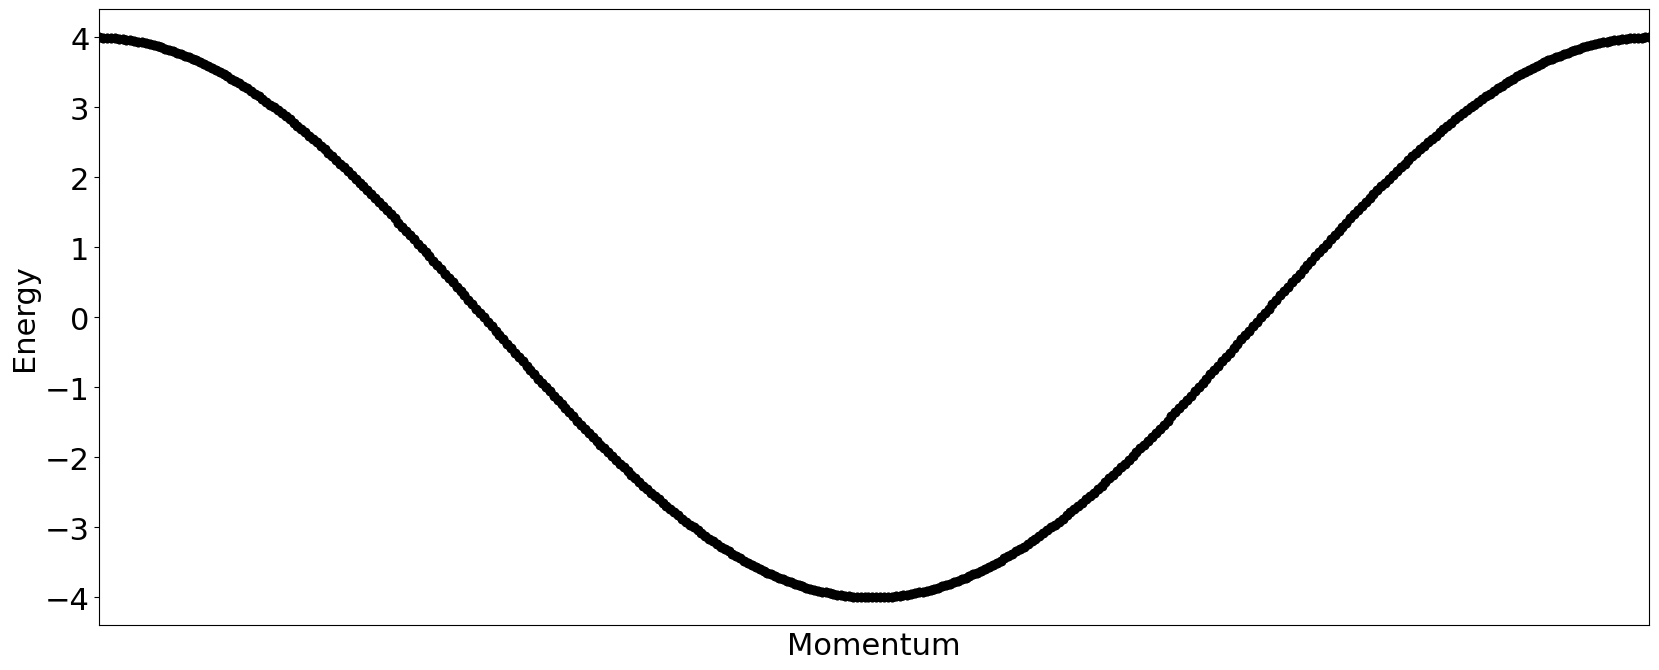

In [2]:
from pyqula import geometry
g = geometry.square_lattice() # geometry of the square lattice
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.xlim([min(k),max(k)])

### Quiz
- At which energies do you have a dispersion relation $E \sim k^2$?
- Replace the square lattice by a triangular one (triangular_lattice). At which energies the dispersion is quadratic?

## (Remider) Bands in the conventional quantum Hall state
Let us review the bandstructure in the quantum Hall state

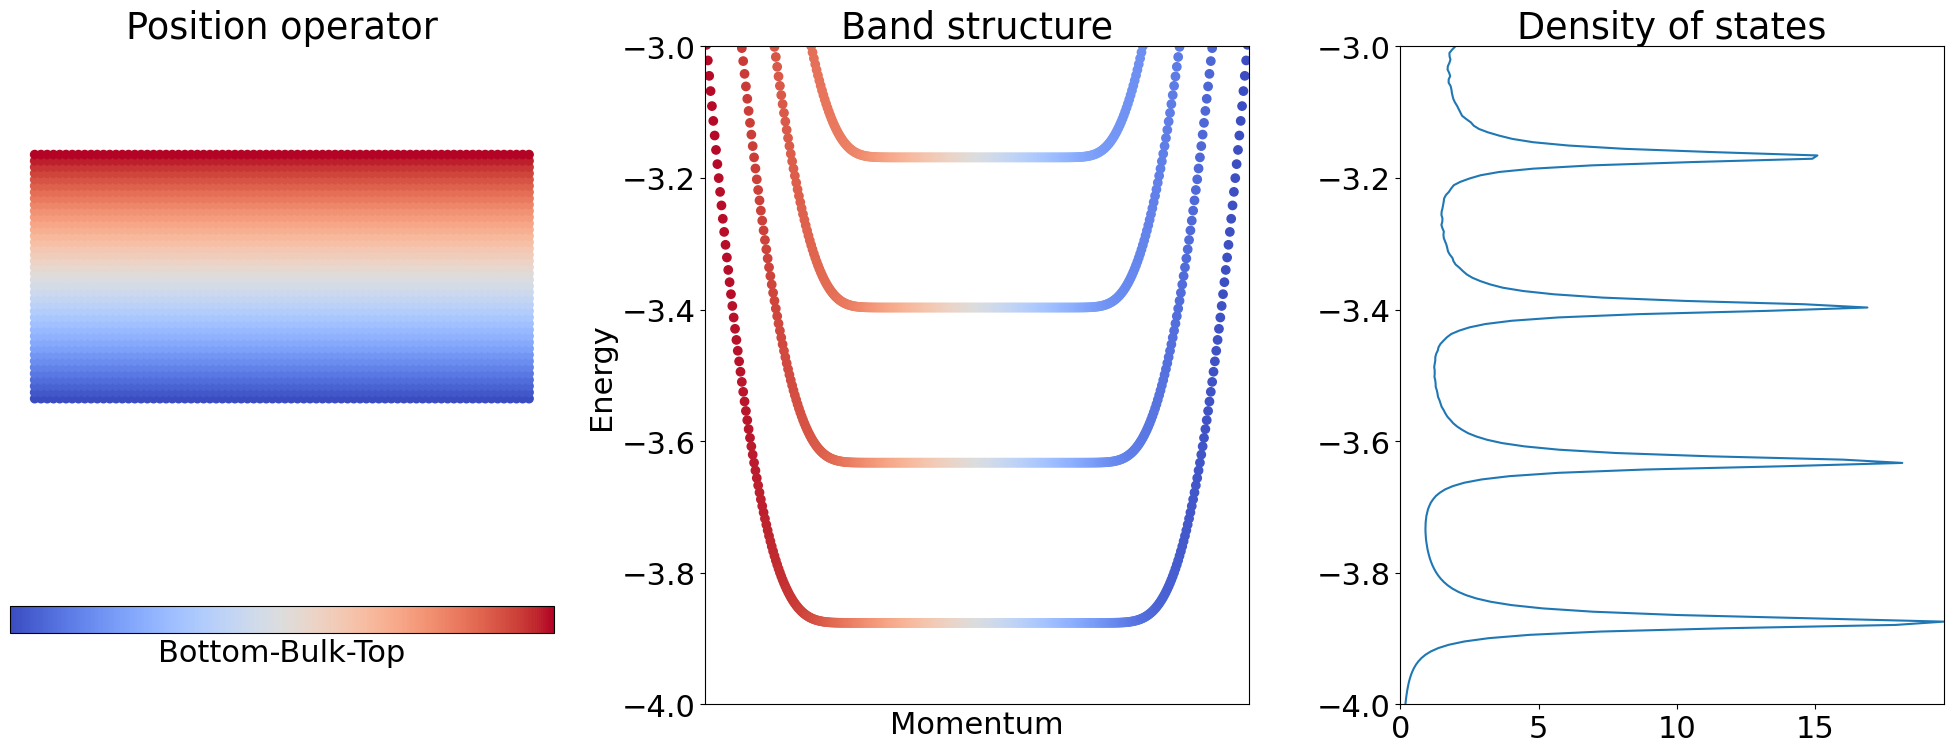

In [3]:
from pyqula import geometry
W = 40 # width
g = geometry.square_ribbon(W) # square ribbon, the number controls the width
h = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
B = 0.02 # magnetic field (in unit flux units)
h.add_orbital_magnetic_field(B) # add an out-of plane magnetic field

# draw a ribbon with the position operator
gs = g.get_supercell(2*W) 
plt.subplot(1,3,1) ; plt.title("Position operator")
plt.scatter(gs.r[:,0],gs.r[:,1],c=gs.r[:,1]) ; plt.axis("equal") ; plt.axis("off")
plt.colorbar(location="bottom",ticks=[],label="Bottom-Bulk-Top")

# plot the bands
plt.subplot(1,3,2) ; plt.title("Band structure")
energies = np.linspace(-4.,-3,200) # energies for the DOS (to be used later)
(k,e,c) = h.get_bands(kpath=["G","X","G"],operator="yposition") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.ylim([min(energies),max(energies)]) ; plt.xlim([min(k),max(k)])


# now plot the DOS
plt.subplot(1,3,3) ; plt.title("Density of states")
(e,d) = h.get_dos(energies=energies,delta=1e-2,nk=400) # compute DOS projected on the bulk
plt.plot(d,e) ; plt.xlim([0,max(d)]) ; plt.ylim([min(e),max(e)]) # plot the DOS

plt.tight_layout()

### Quiz
- Where are the red, grey and blue states located?
- What are the flat states and the dispersive states?
- Increase the magnetic field $B$, how are the states affected and why?
- Increase the width of the ribbon $W$, how are the states affected and why?

## (Exercise): Landau levels of conventional electrons
We will show how edge states and flat bands appear when including a magnetic field

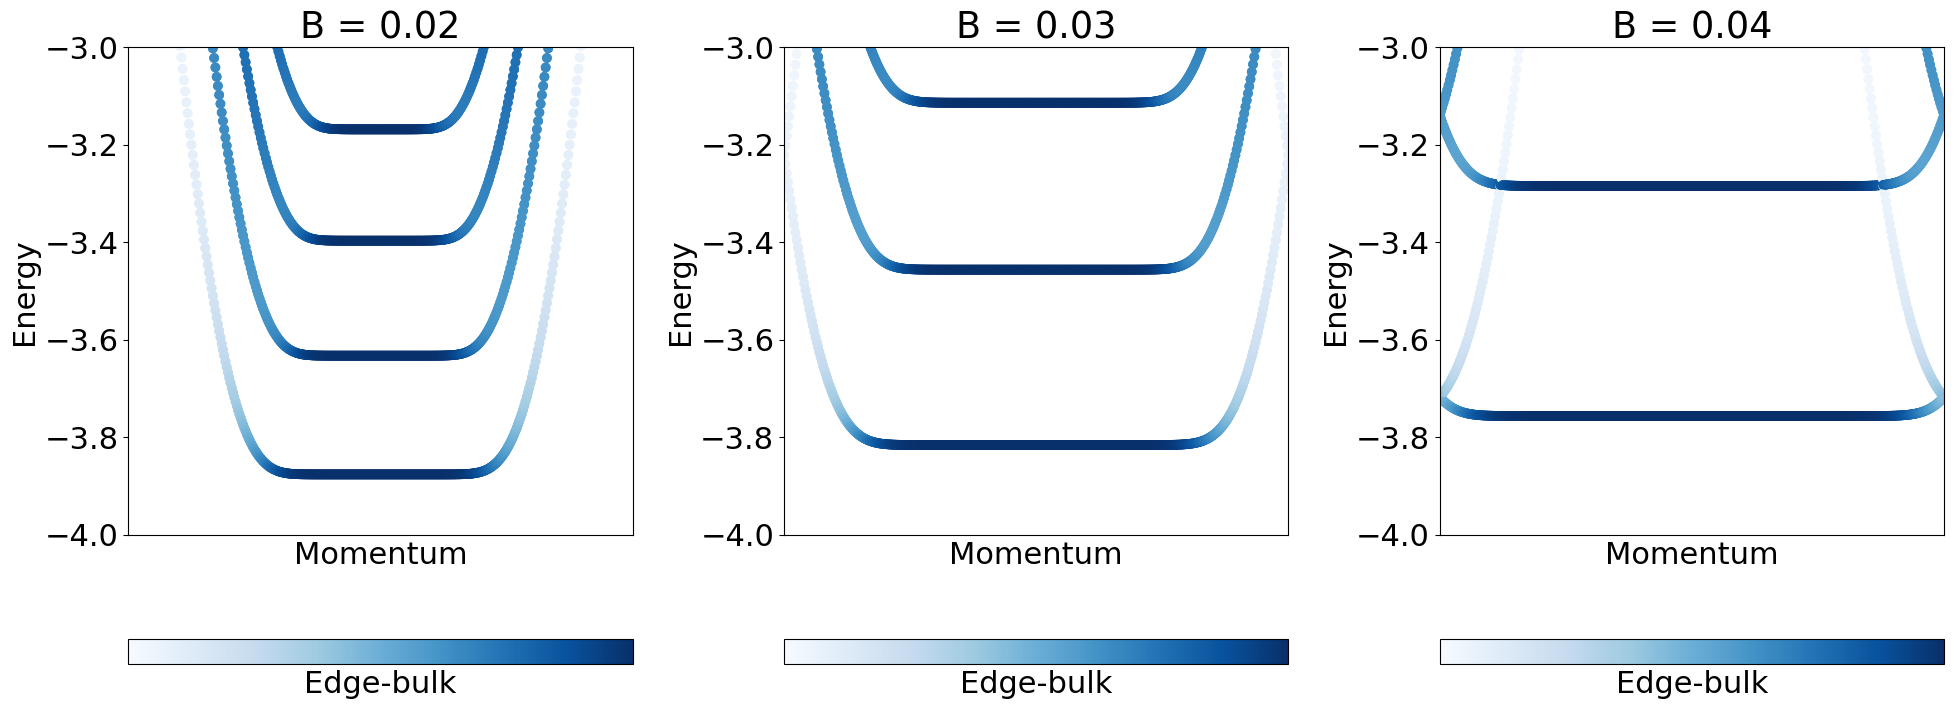

In [4]:
from pyqula import geometry
N = 30 # number of unit cells as the width
g = geometry.square_ribbon(N) # square ribbon, the number controls the width
Bs = [0.02,0.03,0.04] # magnetic field (measured in units of magnetic flux)

ii = 0 # counter
for B in Bs: # loop over magnetic fields
    h = g.get_hamiltonian() # generate the Hamiltonian
    h.add_orbital_magnetic_field(B) # add an out-of plane magnetic field
    # plot the bands
    plt.subplot(1,len(Bs),ii+1) ; plt.title("B = "+str(B)) ; ii += 1 # create subplot and increase counter
    (k,e,c) = h.get_bands(kpath=["G","X","G"],operator="bulk") # compute band structure
    plt.scatter(k,e,c=c,cmap="Blues") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([])
    plt.ylim([-4,-3]) ; plt.xlim([min(k),max(k)])
    plt.colorbar(location="bottom",ticks=[],label="Edge-bulk")
plt.tight_layout()

### Quiz
- Why are there Landau levels of conventional electrons at the bottom of the spectra of a square lattice
- Why does the energy of the lowest Landau level increase with field
- Why does the spacing between Landau levels increase with field
- Increase the width of the ribbon. Do the energies of the flat bands change? Explain why

## (Exercise): Magnetic field dependence of Landau levels
Let us now explicitly see how the energy of the Landau levels depends on the magnetic field

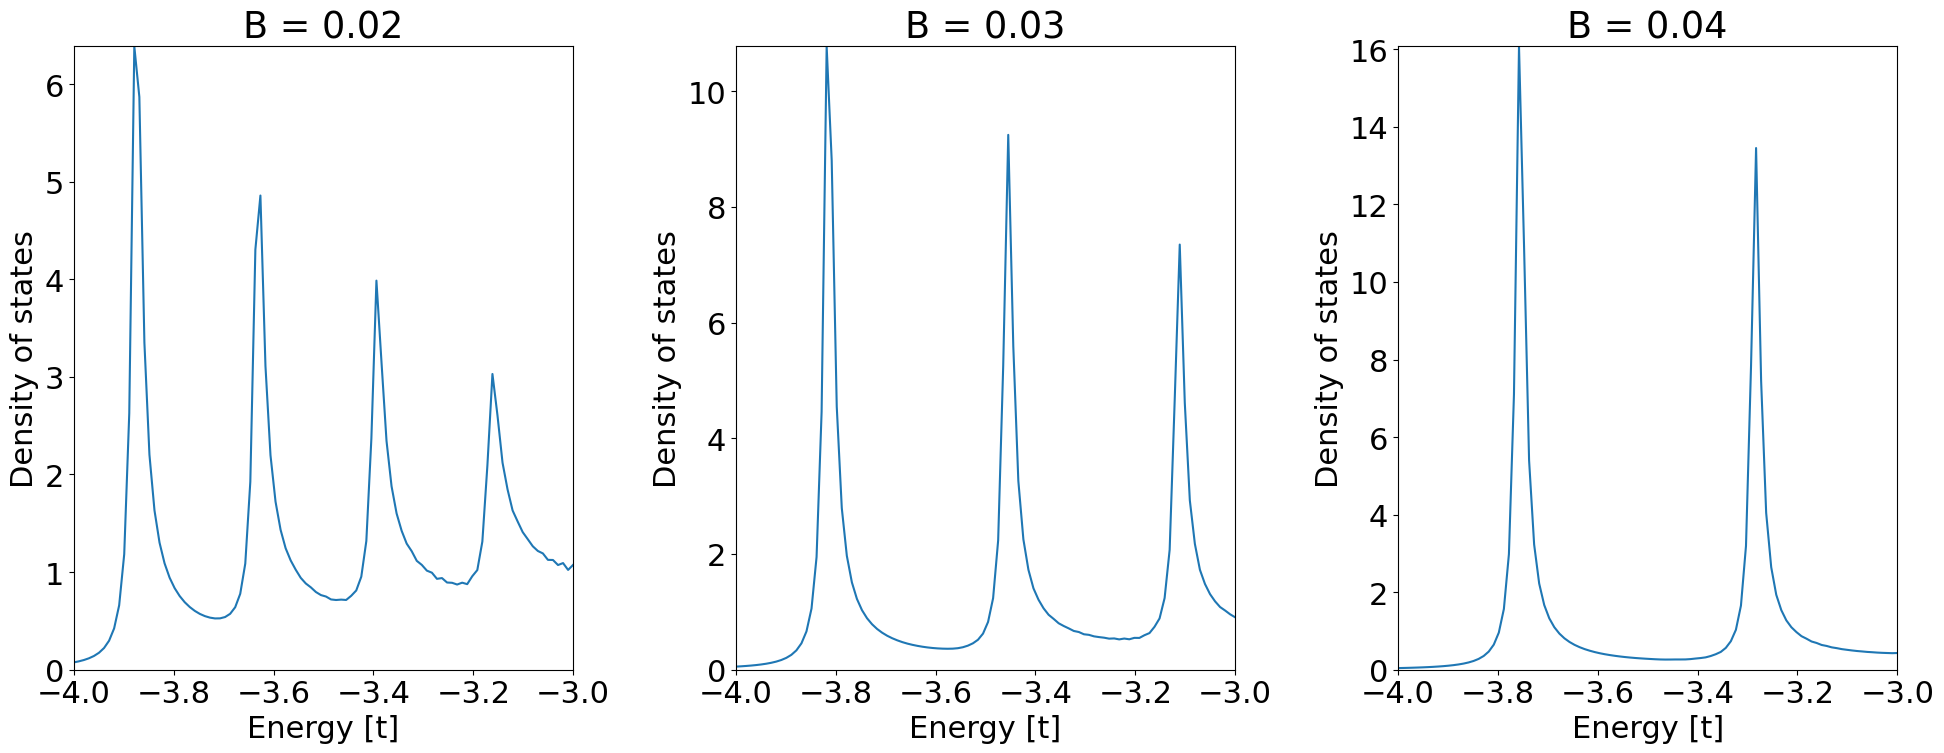

In [5]:
from pyqula import geometry
W = 20 # number of unit cells as the width
g = geometry.square_ribbon(W) # ribbon, the number controls the width
Bs = [0.02,0.03,0.04] # magnetic field (measured in units of magnetic flux)

energies = np.linspace(-4,-3,100)

ii = 0 # counter
for B in Bs: # loop over magnetic fields
    h = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
    h.add_orbital_magnetic_field(B) # add an out-of plane magnetic field
    plt.subplot(1,len(Bs),ii+1) ; plt.title("B = "+str(B)) ; ii += 1 # create subplot and increase counter
    (e,d) = h.get_dos(operator="bulk",energies=energies,delta=1e-2,nk=400) # compute DOS projected on the bulk
    plt.plot(e,d) ; plt.ylim([0,max(d)]) ; plt.xlim([min(e),max(e)]) # plot the DOS
    plt.xlabel("Energy [t]") ; plt.ylabel("Density of states")
plt.tight_layout()

### Quiz
- Why are there peaks in the density of states? 
- Increase the width $W$ of the ribbon. Do the peaks change? Explain why.

## (Exercise): Imaging the magnetic field dependence in the Landau levels
We will now see explicitly the evolution of the energy levels with magnetic field

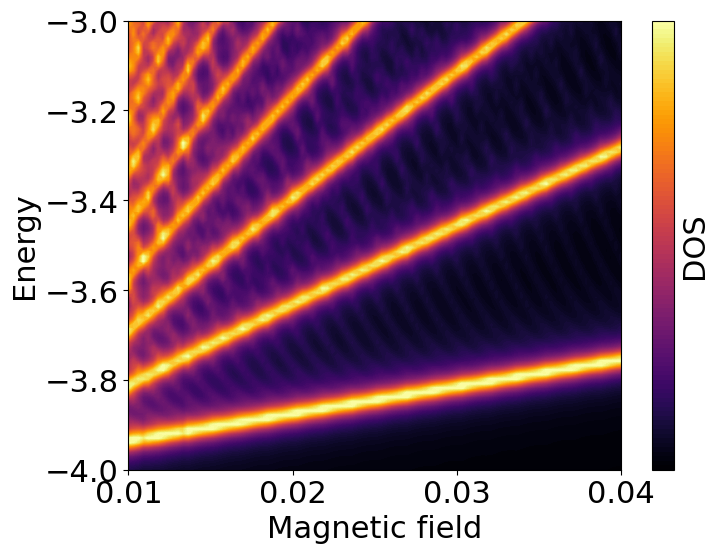

In [6]:
from pyqula import geometry
W = 40 # number of unit cells as the width
g = geometry.square_ribbon(W) # square ribbon 
Bs = np.linspace(0.01,0.04,100) # magnetic field (measured in units of magnetic flux)

energies = np.linspace(-4,-3,100) # energies for the DOS

d_arr,b_arr,e_arr, = [],[],[] # storage for all he energies, magnetic fields and DOS

ii = 0 # counter
for B in Bs: # loop over magnetic fields
    h = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
    h.add_orbital_magnetic_field(B) # add an out-of plane magnetic field
    (e,d) = h.get_dos(energies=energies,delta=2e-2,nk=40) # compute DOS projected on the bulk
    d_arr.append(d/np.max(d)) ; e_arr.append(e) ; b_arr.append(e*0. + B) # store E, B and DOS

# now make the plot    
fig = plt.figure(figsize=[8,6])
plt.contourf(Bs,energies,np.array(d_arr).T,cmap="inferno",levels=100)
plt.colorbar(label="DOS",ticks=[]) ; plt.xlabel("Magnetic field") ; plt.ylabel("Energy")
plt.xlim([np.min(b_arr),np.max(b_arr)]) ; plt.ylim([np.min(e_arr),np.max(e_arr)])
plt.tight_layout()

### Quiz
- What are the peaks in the DOS?
- Increase the width $W$ of the ribbon. Do the peaks in the DOS change? Explain why.
- How does the spacing between peaks evolve with the magnetic field?
- Make the ribbon much narrower. Why does the density of states become so different?

## (Remider): The dispersion of the honeycomb lattice
This is a reminder of the disperison in the honeycomb lattice

(0.0, 399.0)

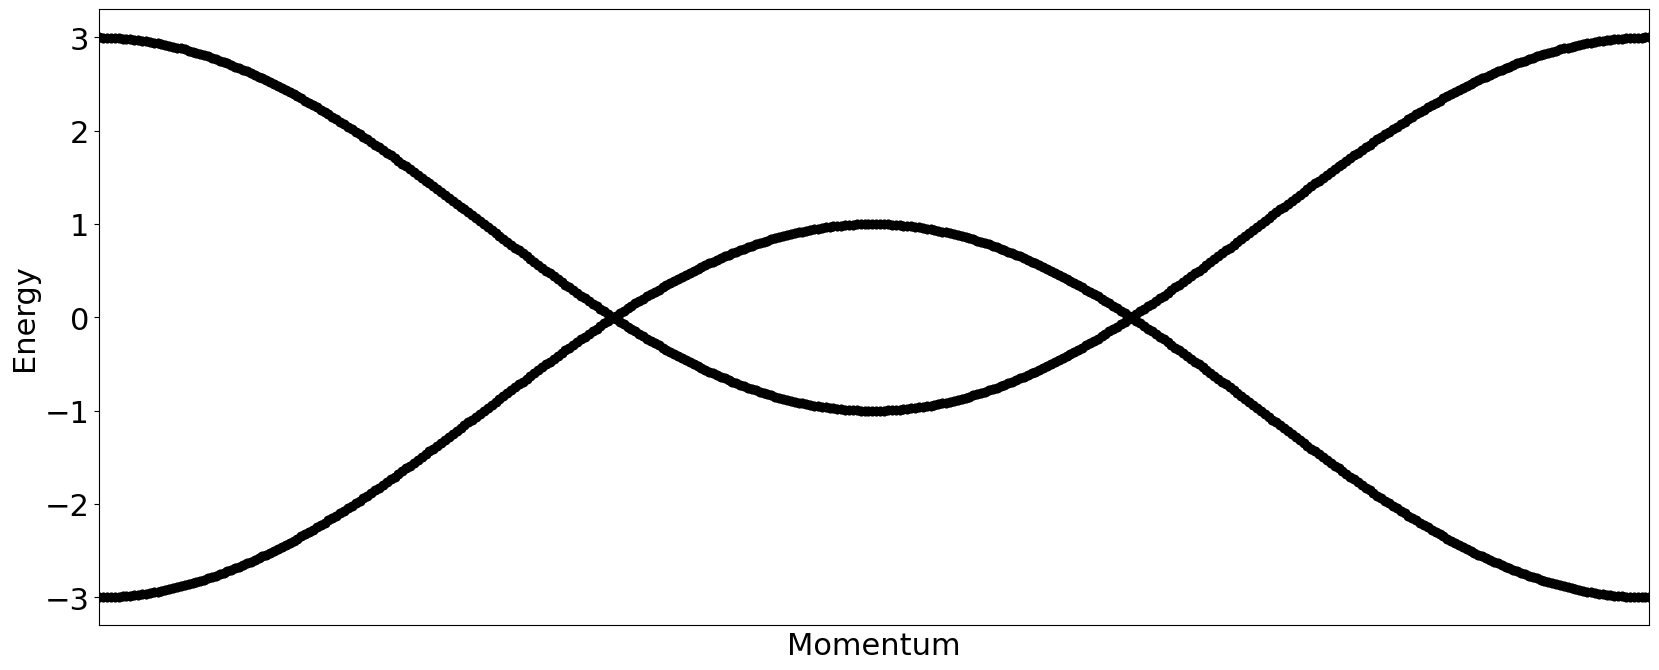

In [7]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # geometry of the square lattice
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.xlim([min(k),max(k)])

### Quiz
- At which energies do you have a linear dispersion relation $E \sim |k|$?
- Replace the square lattice by a kagome one (kagome_lattice). At which energies the dispersion is linear?

## (Remider) Bands in the Dirac quantum Hall state
Let us review the bandstructure in the Dirac quantum Hall state

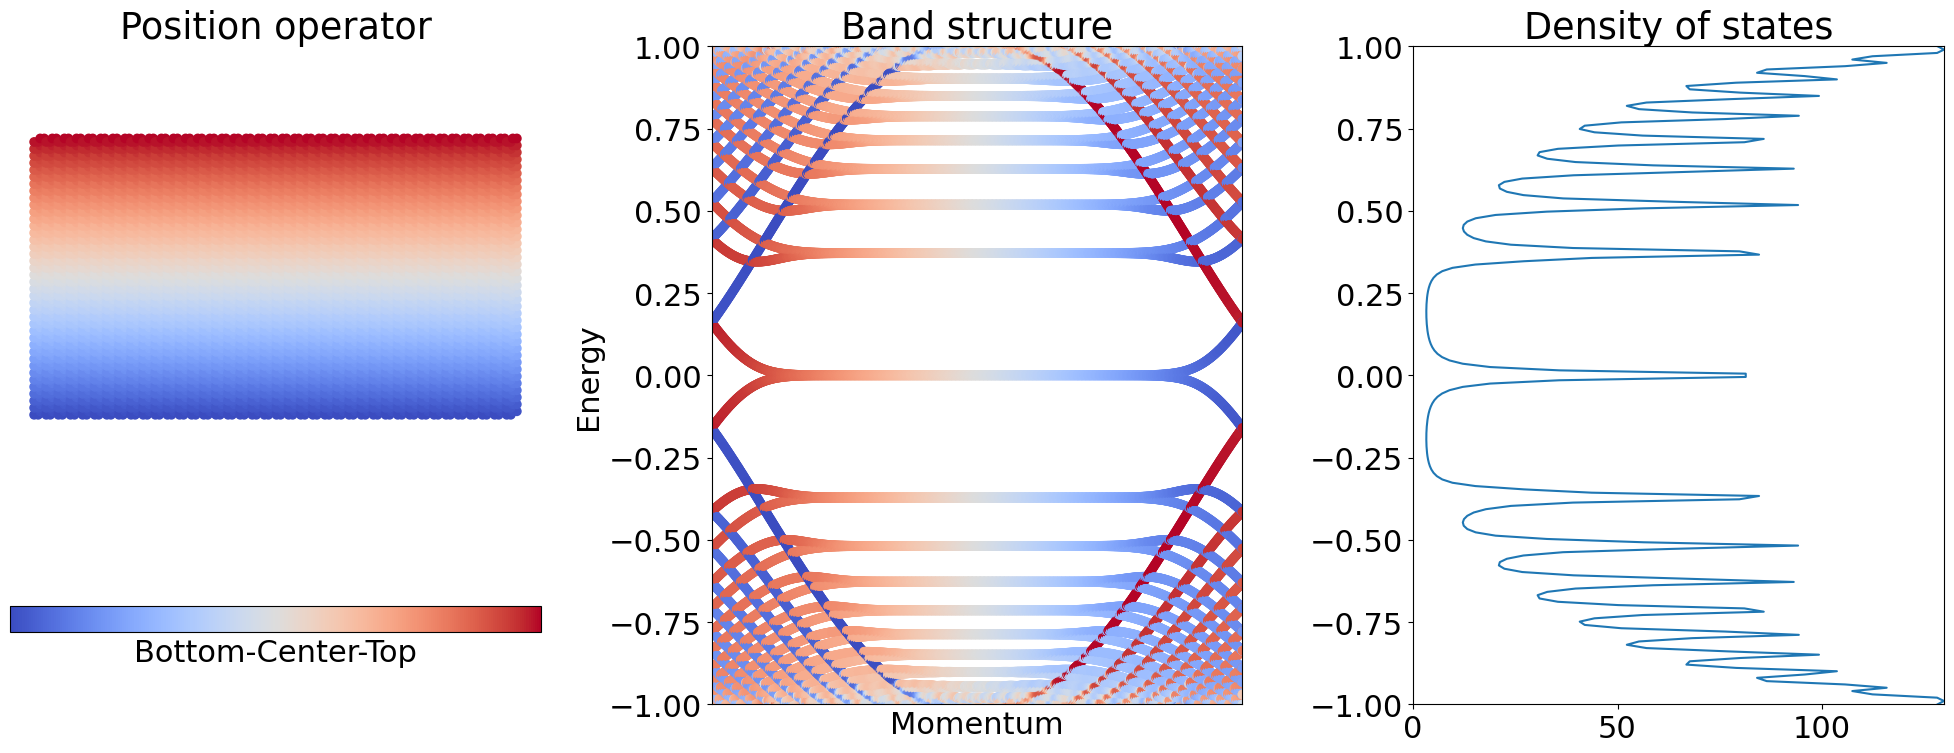

In [8]:
from pyqula import geometry
W = 40 # width
g = geometry.honeycomb_armchair_ribbon(W) # ribbon, the number controls the width
h = g.get_hamiltonian() # generate the Hamiltonian
B = 0.005 # magnetic field (in unit flux units)
h.add_orbital_magnetic_field(B) # add an out-of plane magnetic field

# draw a ribbon with the position operator
gs = g.get_supercell(W) 
plt.subplot(1,3,1) ; plt.title("Position operator")
plt.scatter(gs.r[:,0],gs.r[:,1],c=gs.r[:,1]) ; plt.axis("equal") ; plt.axis("off")
plt.colorbar(location="bottom",ticks=[],label="Bottom-Center-Top")

# plot the bands
plt.subplot(1,3,2) ; plt.title("Band structure")
energies = np.linspace(-1.,1,200) # energies for the DOS (to be used later)
(k,e,c) = h.get_bands(kpath=["X","G","X"],operator="yposition") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.ylim([min(energies),max(energies)]) ; plt.xlim([min(k),max(k)])


# now plot the DOS
plt.subplot(1,3,3) ; plt.title("Density of states")
(e,d) = h.get_dos(energies=energies,delta=1e-2,nk=400) # compute DOS projected on the bulk
plt.plot(d,e) ; plt.xlim([0,max(d)]) ; plt.ylim([min(e),max(e)]) # plot the DOS

plt.tight_layout()

### Quiz
- Where are the red, grey and blue states located?
- What are the flat states and the dispersive states?
- Increase the magnetic field $B$, how are the states affected and why?
- Increase the width of the ribbon $W$, how are the states affected and why?

# Landau levels of the Dirac equation
We will now look at the Landau levels of the honeycomb lattice, that realize a Dirac Landau levels

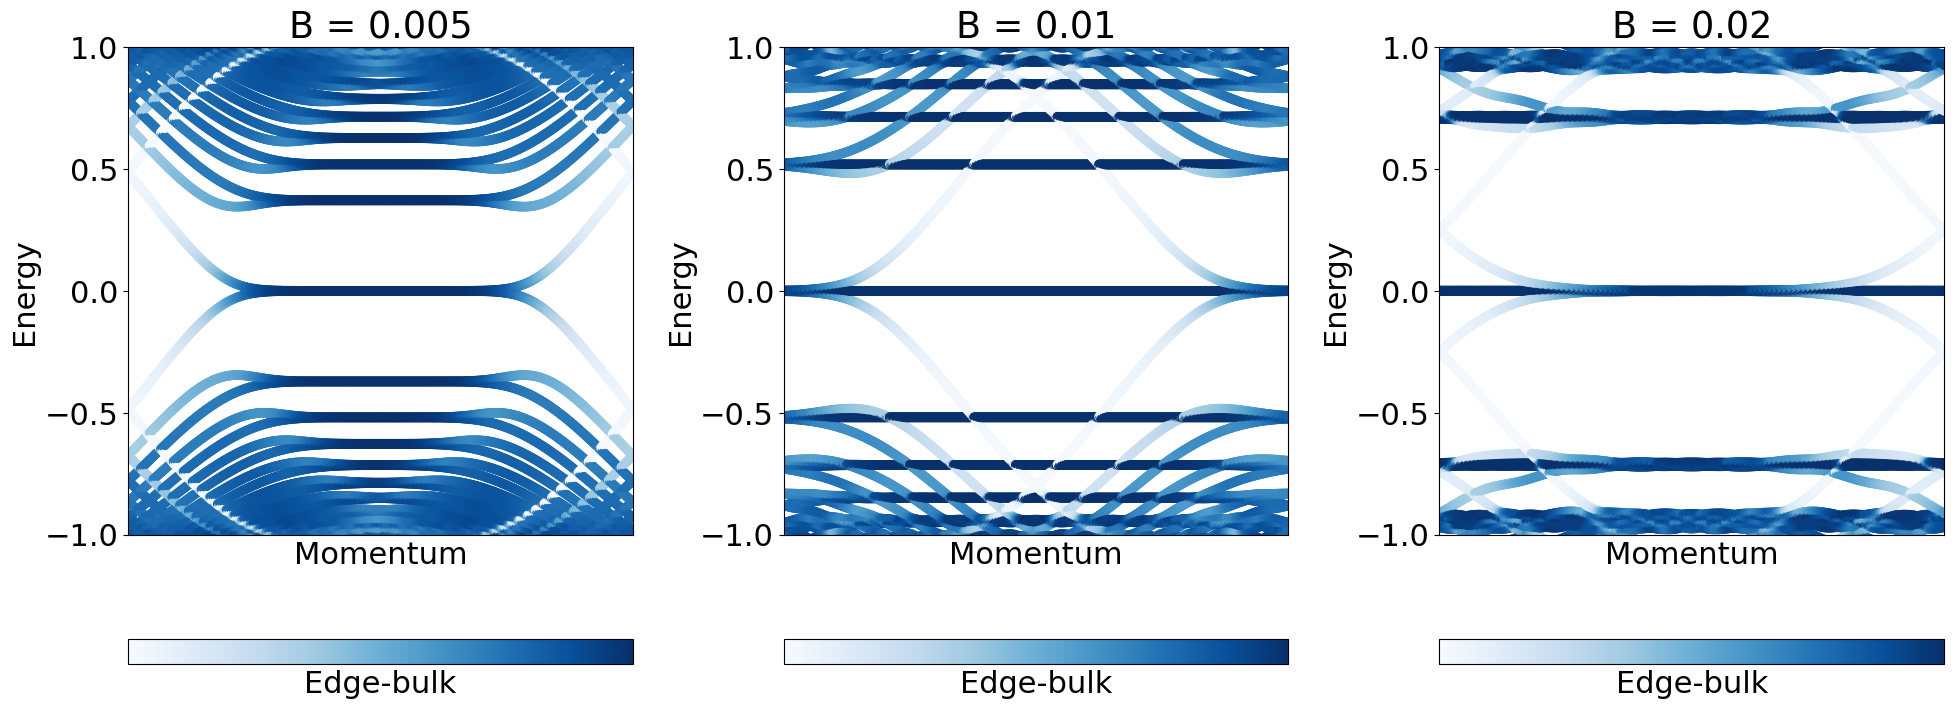

In [9]:
from pyqula import geometry
N = 30 # number of unit cells as the width
g = geometry.honeycomb_armchair_ribbon(N) # honeycomb ribbon with armchair edge, the number controls the width
Bs = [0.005,0.01,0.02] # magnetic field (measured in units of magnetic flux)

ii = 0 # counter
for B in Bs: # loop over magnetic fields
    h = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
    h.add_orbital_magnetic_field(B) # add an out-of plane magnetic field
    # plot the bands
    plt.subplot(1,len(Bs),ii+1) ; plt.title("B = "+str(B)) ; ii += 1 # create subplot and increase counter
    (k,e,c) = h.get_bands(kpath=["X","G","X"],operator="bulk") # compute band structure
    plt.scatter(k,e,c=c,cmap="Blues") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([])
    plt.ylim([-1,1]) ; plt.xlim([min(k),max(k)])
    plt.colorbar(location="bottom",ticks=[],label="Edge-bulk")
plt.tight_layout()

### Quiz
- Why are there Landau levels of Dirac equation in the honecomb lattice
- Why does the spacing between Landau levels increase with field
- Why are the Landau levels not equally spaced?
- Increase the width of the ribbon. Do the energies of the flat bands change? Explain why

## (Exercise): Magnetic field dependence of Landau levels
Let us now explicitly see how the energy of the Landau levels depends on the magnetic field

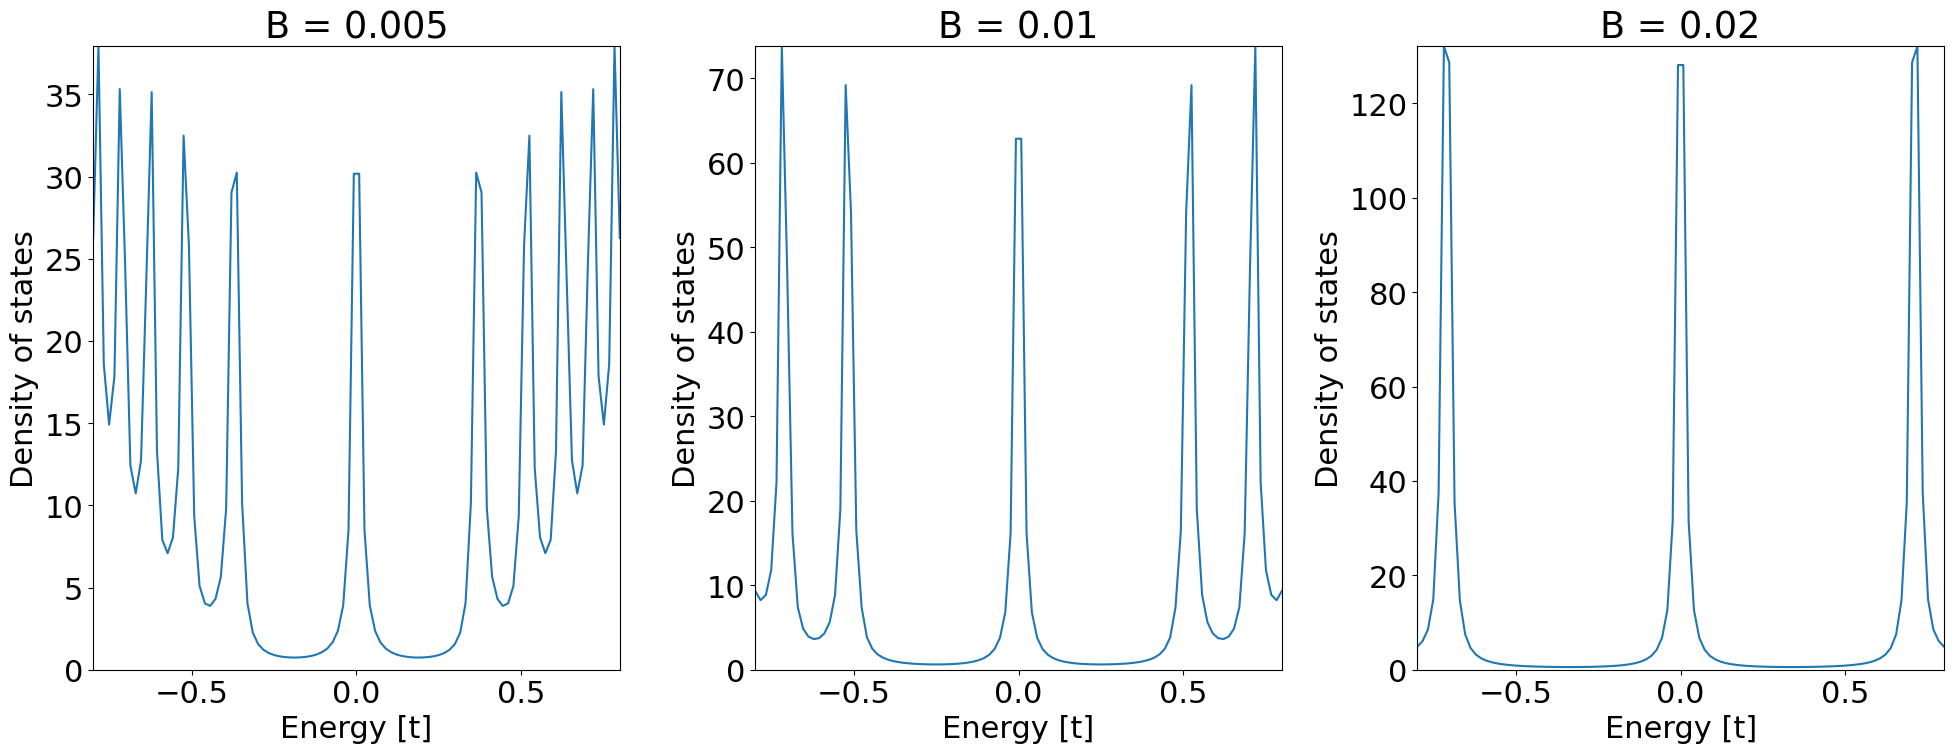

In [10]:
from pyqula import geometry
W = 40 # number of unit cells as the width
g = geometry.honeycomb_armchair_ribbon(W) # honeycomb ribbon with armchair edge, the number controls the width
Bs = [0.005,0.01,0.02] # magnetic field (measured in units of magnetic flux)

energies = np.linspace(-0.8,.8,100)

ii = 0 # counter
for B in Bs: # loop over magnetic fields
    h = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
    h.add_orbital_magnetic_field(B) # add an out-of plane magnetic field
    plt.subplot(1,len(Bs),ii+1) ; plt.title("B = "+str(B)) ; ii += 1 # create subplot and increase counter
    (e,d) = h.get_dos(operator="bulk",energies=energies,delta=1e-2,nk=400) # compute DOS projected on the bulk
    plt.plot(e,d) ; plt.ylim([0,max(d)]) ; plt.xlim([min(e),max(e)]) # plot the DOS
    plt.xlabel("Energy [t]") ; plt.ylabel("Density of states")
plt.tight_layout()

### Quiz
- Why are there peaks in the density of states?
- Increase the width $W$ of the ribbon. Do the peaks change? Explain why.

## (Exercise): Imaging the magnetic field dependence in the Dirac Landau levels
We will now see explicitly the evolution of the Dirac Landau energy levels with magnetic field

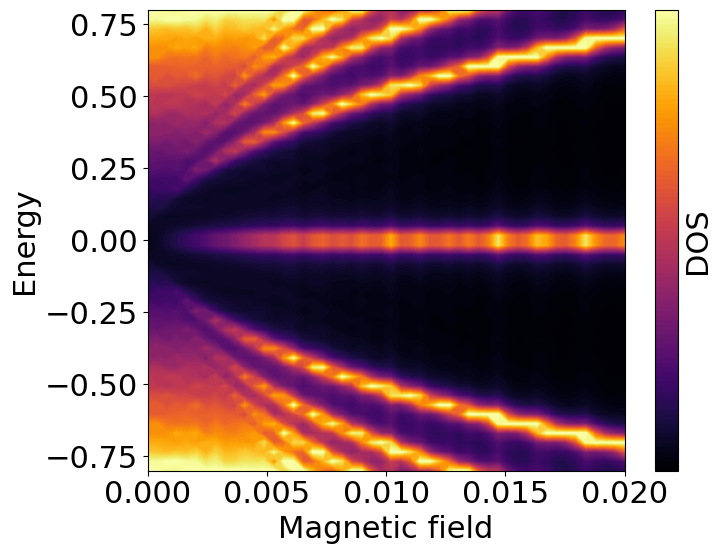

In [11]:
from pyqula import geometry
W = 30 # number of unit cells as the width
g = geometry.honeycomb_armchair_ribbon(W) # honeycomb ribbon
ngrid = 50 # grid points
Bs = np.linspace(0.0,0.02,ngrid) # magnetic field (measured in units of magnetic flux)

energies = np.linspace(-.8,.8,ngrid) # energies for the DOS

d_arr,b_arr,e_arr, = [],[],[] # storage for all he energies, magnetic fields and DOS

ii = 0 # counter
for B in Bs: # loop over magnetic fields
    h = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
    h.add_orbital_magnetic_field(B) # add an out-of plane magnetic field
    (e,d) = h.get_dos(energies=energies,delta=2e-2,nk=40) # compute DOS projected on the bulk
    d_arr.append(d/np.max(d)) ; e_arr.append(e) ; b_arr.append(e*0. + B) # store E, B and DOS

# now make the plot    
fig = plt.figure(figsize=[8,6])
plt.contourf(Bs,energies,np.array(d_arr).T,cmap="inferno",levels=100)
plt.colorbar(label="DOS",ticks=[]) ; plt.xlabel("Magnetic field") ; plt.ylabel("Energy")
plt.xlim([np.min(b_arr),np.max(b_arr)]) ; plt.ylim([np.min(e_arr),np.max(e_arr)])
plt.tight_layout()

### Quiz
- What are the peaks in the DOS?
- Increase the width $W$ of the ribbon. Do the peaks in the DOS change? Explain why.
- How does the spacing between peaks evolve with the magnetic field?
- Make the ribbon much narrower. Why does the density of states become so different?

#### In the lab
- The quantum Hall state in graphene appears even at room temperature
https://www.science.org/doi/10.1126/science.1137201

## Localization of the edge states in the quantum Hall effect in a ribbon
Let us now look at where the states are localized as function of energy

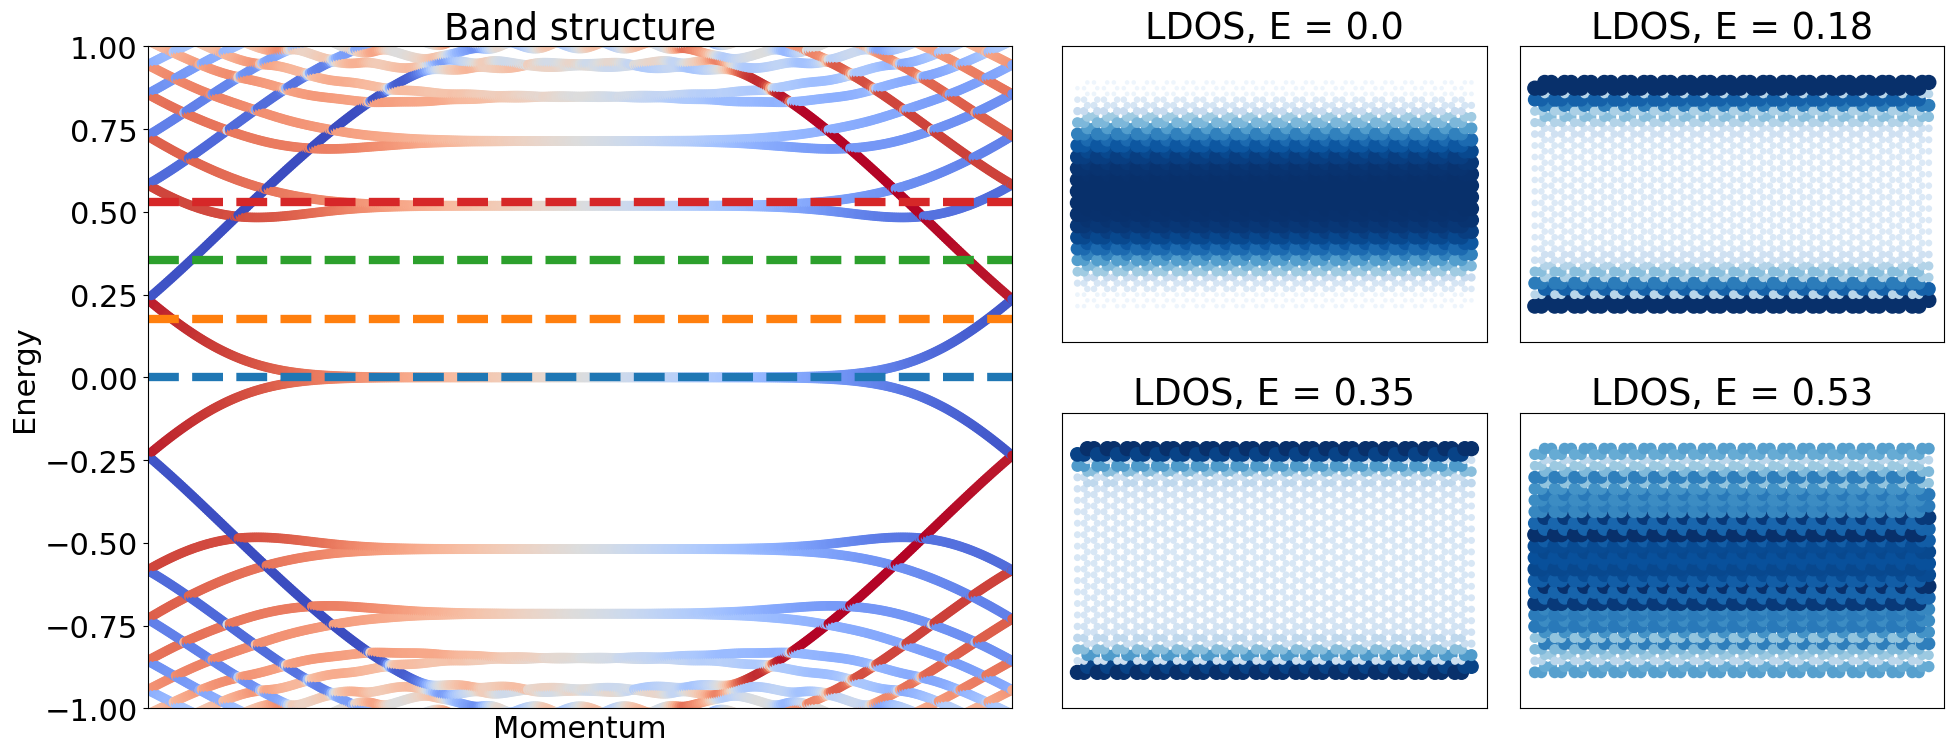

In [12]:
from pyqula import geometry
ws = np.linspace(0.,0.53,4) # energies
iis = [3,4,7,8] # indexes for the plot

g = geometry.honeycomb_armchair_ribbon(20) # honeycomb ribbon with armchair edge, the number controls the width
h = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
h.add_orbital_magnetic_field(0.01) # add an out-of plane magnetic field

ii = 0 # counter for the subplots
for w in ws:
    plt.subplot(2,4,iis[ii]) ; ii+=1
    (x,y,d) = h.get_ldos(e=w,nrep=20,delta=1e-2,nk=50) # compute local density of states
    plt.title("LDOS, E = "+str(np.round(w,2))) # set the title
    plt.scatter(x,y,c=d,s=d/np.max(d)*100,vmin=0.,cmap="Blues") ; plt.yticks([]) ; plt.xticks([]) ; plt.axis("equal")# plot
plt.tight_layout() # adjust the subplots


# plot the bands
plt.subplot(1,2,1) ; plt.title("Band structure")
(k,e,c) = h.get_bands(kpath=["X","G","X"],operator="yposition") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
for w in ws: # plot the energies
    plt.plot([min(k),max(k)],[w,w],linewidth=6,linestyle="dashed")
plt.ylim([-1,1.]) ; plt.xlim([min(k),max(k)])

plt.tight_layout()

### Exercise
- Recompute the previous local density of states, but now with a smaller magnetic field. What happens to the edge states?
- Recompute the previous local density of states, but now with a narrower ribbon. What happens to the edge states?

## Localization of the edge states in the quantum Hall effect in an island
Let us now look at where the states are localized as function of energy in a finite island

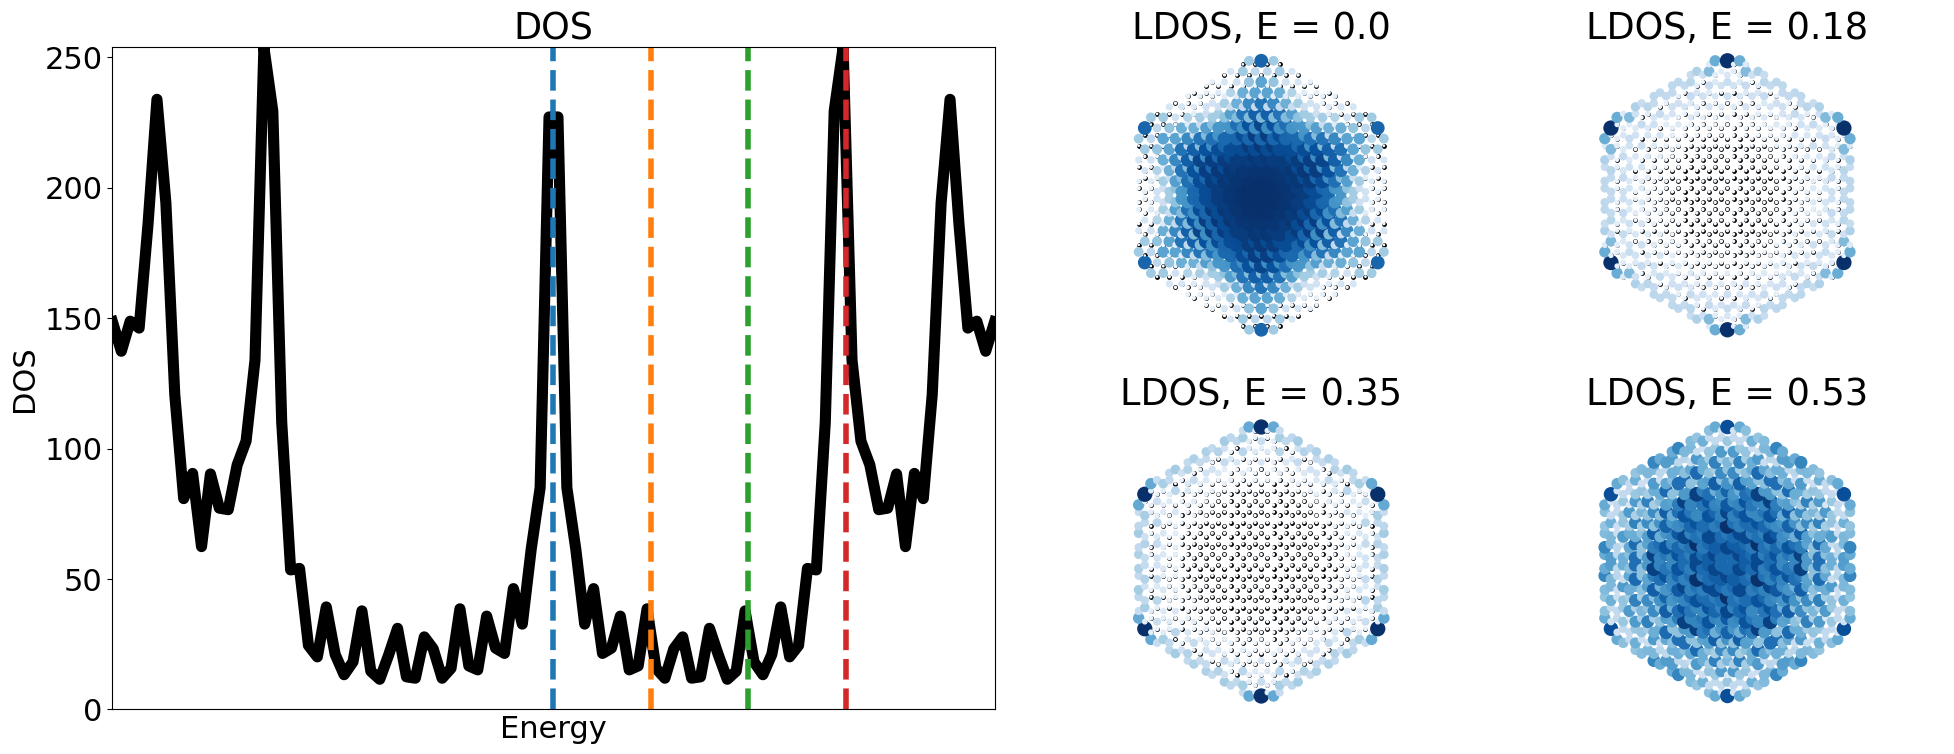

In [13]:
from pyqula import islands
W = 12 # this controls the size of the island
g = islands.get_geometry(name="honeycomb",n=W,nedges=6,rot=np.pi/6.) # get an armchair island
h = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian, now also with 2nd neighbor hopping
h.add_orbital_magnetic_field(0.01) # add an out-of plane magnetic field

ws = np.linspace(0.,0.53,4) # energies
iis = [3,4,7,8] # indexes for the plot

ii = 0 # counter for the subplots
for w in ws:
    plt.subplot(2,4,iis[ii]) ; ii+=1
    (x,y,d) = h.get_ldos(e=w,nrep=20,delta=1e-2,nk=50) # compute local density of states
    plt.title("LDOS, E = "+str(np.round(w,2))) # set the title
    plt.scatter(x,y,s=6,c="black")
    plt.scatter(x,y,c=d,s=d/np.max(d)*100,vmin=0.,cmap="Blues") ; plt.yticks([]) ; plt.xticks([]) 
    plt.axis("equal") ; plt.axis("off")



# plot the DOS
energies = np.linspace(-0.8,.8,100) # energies for DOS
plt.subplot(1,2,1) ; plt.title("DOS")
(e,d) = h.get_dos(energies=energies,delta=1e-2) # compute DOS 
plt.plot(e,d,c="black",linewidth=8) ; plt.ylabel("DOS") ; plt.xlabel("Energy") ; plt.xticks([]) 
for w in ws: # plot the energies
    plt.plot([w,w],[min(k),max(k)],linewidth=4,linestyle="dashed") # energies of the LDOS
plt.ylim([0,max(d)]) ; plt.xlim([min(e),max(e)])

plt.tight_layout() # adjust the subplots

### Exercise
- Recompute the previous local density of states, but now with a smaller magnetic field. What happens to the edge states?
- Recompute the previous local density of states, but now with a narrower ribbon. What happens to the edge states?
- Can you understand the spectra in this geometry by looking at the one shown in the ribbon previously?

## Topological equivalence between the Quantum Hall state and a Chern insulator
Here we will show that a quantum Hall state can be adiabatically connected to a Chern insulator

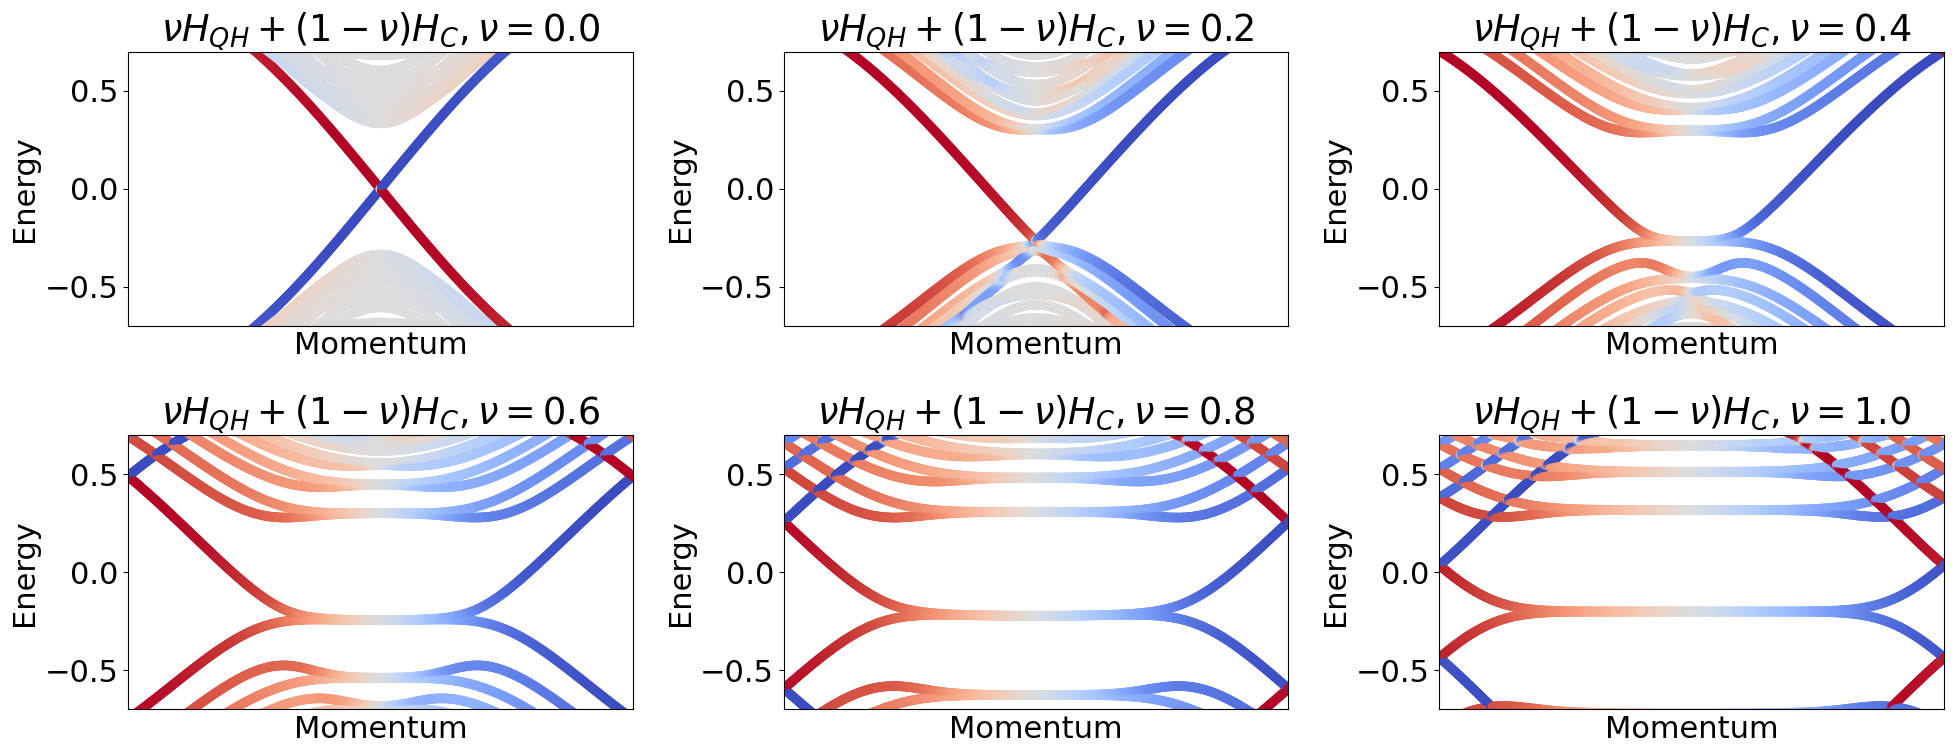

In [14]:
from pyqula import geometry
W = 20 # width of the ribbon
g = geometry.honeycomb_armchair_ribbon(W) # honeycomb ribbon with armchair edge
#g = geometry.honeycomb_zigzag_ribbon(W) # honeycomb ribbon with zigzag edge

# create a quantum Hall state
H_hall = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
H_hall.add_orbital_magnetic_field(0.01) # add an out-of plane magnetic field
H_hall.add_onsite(-0.2) # shift the chemical potential

# create a Chern insulator
H_chern = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
H_chern.add_haldane(0.07) # open a topological gap with C=1

nus = np.linspace(0.,1.,6) # interpolate between both Hamiltonians

ii = 1 # initialize
for nu in nus: # loop over interpoaltions
    H = H_hall*nu + H_chern*(1-nu) # interpolated Hamiltonian
    (k,e,c) = H.get_bands(kpath=["X","G","X"],operator="yposition") # compute band structure
    plt.subplot(2,len(nus)//2,ii) ; ii+=1
    plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([])
    plt.title("$\\nu H_{QH} + (1-\\nu) H_{C}, \\nu = $"+str(np.round(nu,1)))
    plt.ylim([-0.7,0.7]) ; plt.xlim([min(k),max(k)])
plt.tight_layout()

### Quiz
- How do you know in the previous plots that the bulk gap is not clossing?
- Can you follow the evolution the edge modes from Hamiltonian to Hamiltonian
- If you make the ribbon wider $W$, does the previous phenomenology change? Explain why.
- If you make the ribbon narrower $W$, does the previous phenomenology change? Explain why.

## Topological domains in the quantum Hall state
We will now see how regions with different Chern numbers give rise to interface modes

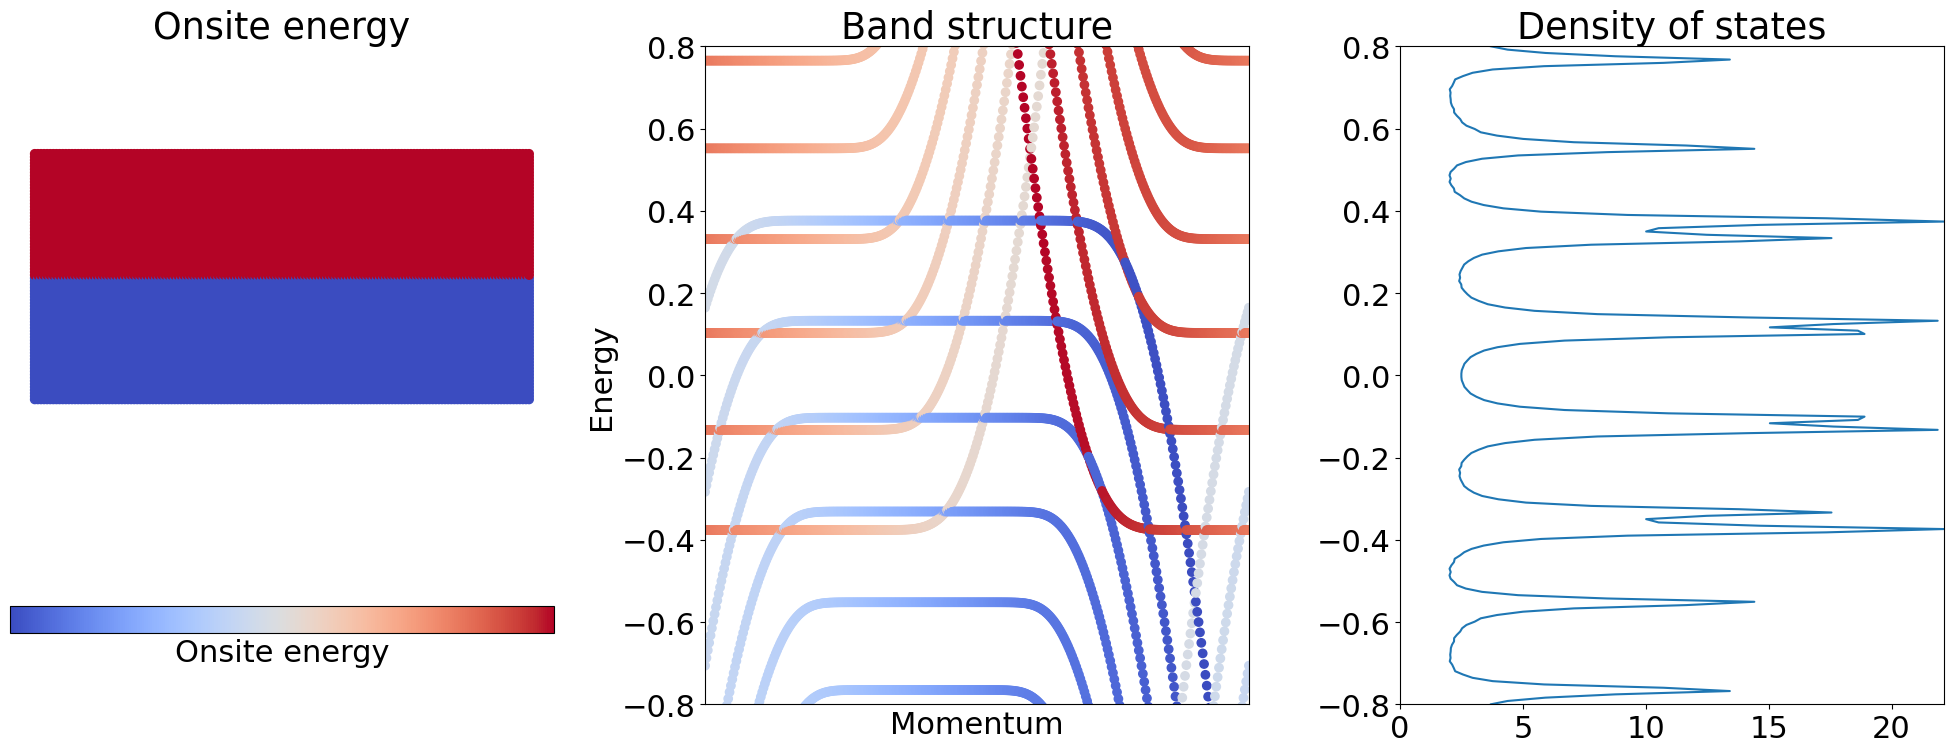

In [15]:
from pyqula import geometry
W = 80 # width
g = geometry.square_ribbon(W) # square ribbon, the number controls the width
g.center()
h = g.get_hamiltonian(has_spin=False) # generate the Hamiltonian
B = 0.02 # magnetic field (in unit flux units)
h.add_orbital_magnetic_field(B) # add an out-of plane magnetic field

mu = 3.5 # chemical potential for the parabolic bands

def mufun(r): # spatially dependent chemical potential
    if r[1]>0.: return mu # hole band in the upper part
    else: return -mu # electron band in the bottom part

h.add_onsite(mufun) # add spatially dependent chemical potential
    
# draw a ribbon
gs = g.get_supercell(2*W) 
plt.subplot(1,3,1) ; plt.title("Onsite energy")
cs = [mufun(ri) for ri in gs.r] # color according to magnetic field
plt.scatter(gs.r[:,0],gs.r[:,1],c=cs) ; plt.axis("equal") ; plt.axis("off")
plt.colorbar(location="bottom",ticks=[],label="Onsite energy")

# plot the bands
plt.subplot(1,3,2) ; plt.title("Band structure")
energies = np.linspace(-.8,.8,200) # energies for the DOS (to be used later)
(k,e,c) = h.get_bands(kpath=["G","X","G"],operator="yposition") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.ylim([min(energies),max(energies)]) ; plt.xlim([min(k),max(k)])


# now plot the DOS
plt.subplot(1,3,3) ; plt.title("Density of states")
(e,d) = h.get_dos(energies=energies,delta=1e-2,nk=400) # compute DOS projected on the bulk
plt.plot(d,e) ; plt.xlim([0,max(d)]) ; plt.ylim([min(e),max(e)]) # plot the DOS

plt.tight_layout()

### Quiz
- Why do the edge states propagate in different directions in the two domains?
- What is the Chern number of the upper and lower part of the ribbon
- Make the ribbon wider, does the number of edge states crossing zero energy change?
- What is the relative sign of the Hall conductivity in the top with respect to the bottom?